In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
# tahe math_score as dependant variable
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [72]:
# do the encoding using column transformer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numerical_col=X.select_dtypes(exclude='object').columns
categorical_col = X.select_dtypes(include='object').columns

oh_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

preprocessor = ColumnTransformer (
    [
        ("OneHotEcoder",oh_encoder,categorical_col),
        ("StandardScaler",standard_scaler,numerical_col)
    ]
)

X = preprocessor.fit_transform(X)


In [73]:

X.shape

(1000, 19)

In [74]:
#Do train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [75]:
X_train.shape, X_test.shape

((750, 19), (250, 19))

Create the evaluate function to return the performance metrics

In [76]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [77]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3132
- Mean Absolute Error: 4.2633
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4572
- Mean Absolute Error: 4.3230
- R2 Score: 0.8790


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error: 5.1837
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error: 5.2217
- R2 Score: 0.8200


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2976
- Mean Absolute Error: 4.2368
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4788
- Mean Absolute Error: 4.3354
- R2 Score: 0.8780


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7919
- Mean Absolute Error: 4.5861
- R2 Score: 0.8497
-----------------------

In [78]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.878951
2,Ridge,0.877990
7,CatBoosting Regressor,0.854830
5,Random Forest Regressor,0.852003
8,AdaBoost Regressor,0.847169
6,XGBRegressor,0.836290
1,Lasso,0.820027
3,K-Neighbors Regressor,0.793207
4,Decision Tree,0.761275


In [87]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.90


Text(0, 0.5, 'predicted')

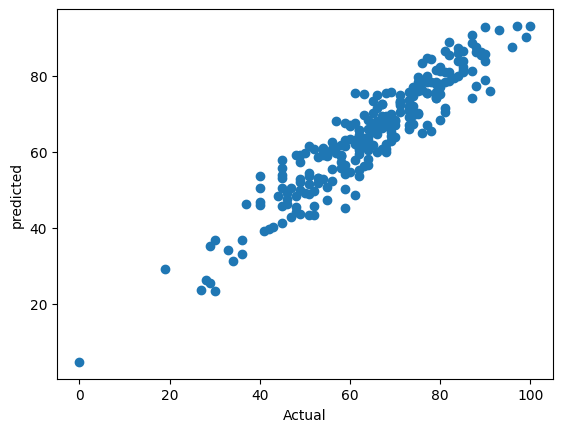

In [89]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

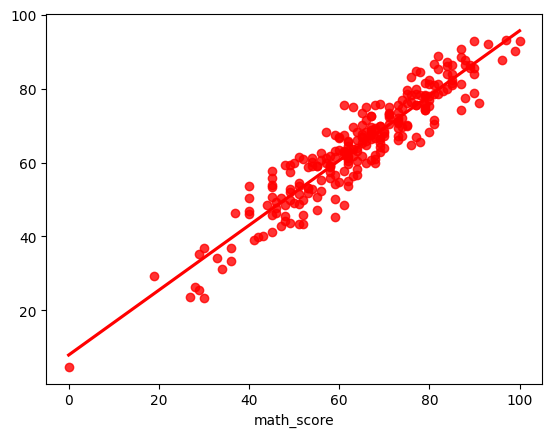

In [92]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [93]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.125,14.875
737,53,58.750,-5.750
740,80,77.000,3.000
660,74,77.000,-3.000
411,84,87.250,-3.250
...,...,...,...
109,70,63.875,6.125
430,64,63.125,0.875
77,80,82.375,-2.375
84,42,39.750,2.250
